Big-Data for Computational Finance
Academic Year: 2023/24
Assignment 1
Sofia Sampogna Montemayor


## Model
### The model can briefly be described as follows. Assume we have some capital and n different assets. A fraction xj of the total capital is invested in asset j, for j = 1, …, n. The annual (or daily) return of each asset is modelled as a random variable ξj

The random variables can be correlated and it is assumed that the expected values µj = E[ξj] and the covariance matrix Cij = E[(ξi − µi)(ξj − µj)] are known, for any i, j = 1, …, n. The annual return of an asset is defined as the relative change of the asset price in a year. For given expected returns µ = (µ1, …, µn), given correlation matrix C and a given expected return of the portfolio, r = µTx,the Markowitz portfolio optimization problem is then to determine the vector x = (x1, …, xn)^T that minimises the variance of the portfolio, i.e.

\begin{align*} \min & \hspace{1cm}& x^T Cx \ \text{subject to} & \\ \hspace{1cm}&µ^T x = r \geq 14\ & \\ \hspace{1cm}&e^T x = 1 where e = (1, ..., 1)^T \geq 13\ & \\ \hspace{1cm}&x>=0 \geq 15\end{align*}

In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt

n = 8

# replace d1 with the second-to-last digit of your registration number
# replace d2 with the last digit of your registration number
d1 = 1
d2 = 0

dummystep = 10*d1+d2

for _ in range(dummystep):
    dummy = random.uniform(0,1)
    
corr = np.array([[0]*n for _ in range(n)], dtype = float)
for i in range(n):
    for j in range(n):
        corr[i][j] = (-1)**abs(i-j)/(abs(i-j)+1)
ssigma = np.array([[0]*1 for _ in range(n)], dtype = float)

# mmu is the vector μ in the assignment
mmu = np.array([[0]*1 for _ in range(n)], dtype = float)
ssigma[0] = 2
mmu[0] = 3
for i in range(n-1):
    ssigma[i+1] = ssigma[i] + 2*random.uniform(0,1)
    mmu[i+1] = mmu[i] + 1

ddiag = np.array([[0]*n for _ in range(n)], dtype = float)
np.fill_diagonal(ddiag, ssigma)
C2 = np.matmul(np.matmul(ddiag,corr), ddiag)
# C is the matrix C in the assignment
C = 0.5*(C2 + C2.T)

print(C)

[[  4.          -2.67908635   2.99646282  -3.02413907   2.58500905
   -2.54604309   2.63984593  -2.59037873]
 [ -2.67908635   7.17750367  -6.02083698   5.40128647  -4.32841404
    4.09264158  -4.1255522    3.96562759]
 [  2.99646282  -6.02083698  20.20227626 -13.59258045   9.6823544
   -8.58276391   8.3057102   -7.76197355]
 [ -3.02413907   5.40128647 -13.59258045  36.5816685  -19.54356719
   15.3991768  -13.97070714  12.53386482]
 [  2.58500905  -4.32841404   9.6823544  -19.54356719  41.76419875
  -24.68079168  19.90340809 -16.74038113]
 [ -2.54604309   4.09264158  -8.58276391  15.3991768  -24.68079168
   58.34101896 -35.2860979   26.38086346]
 [  2.63984593  -4.1255522    8.3057102  -13.97070714  19.90340809
  -35.2860979   85.36763515 -47.86740517]
 [ -2.59037873   3.96562759  -7.76197355  12.53386482 -16.74038113
   26.38086346 -47.86740517 107.36099105]]


## Task 1

In [7]:
from scipy.optimize import minimize

#Adjust the given numpy array by flattening it to avoid data type handling issues. 
mmu = mmu.flatten()

def markowitz_optimization_1(C, mmu, n, expected_return):

    constraints = [
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}, # Constraint to make sum of weights of invesments in the portafolio to be equal to 1
        {'type': 'eq', 'fun': lambda x: np.dot(mmu, x) - expected_return} # Constraint to make the expected return of the portafolio to be equal to the given expected return
    ]
    bounds = tuple((0, 1) for _ in range(n)) # Bounds for each weight of the investments in the portafolio, making them all positive avoids the use of shortselling

    def objective(x):
        return np.dot(np.dot(x.T, C), x) # Objective function to minimize the variance of the portafolio

    x0 = np.array([1./n] * n) # Initial  investments in the portafolio, setting them to equal numbers. 

    result = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=constraints) # Calling minimize for the objective function with the given constraints and bounds

    optimal_weights = result.x # Getting the optimal weights of the investments in the portafolio
    portfolio_variance = np.dot(np.dot(optimal_weights.T, C), optimal_weights) # Getting the variance of the portafolio
    return portfolio_variance


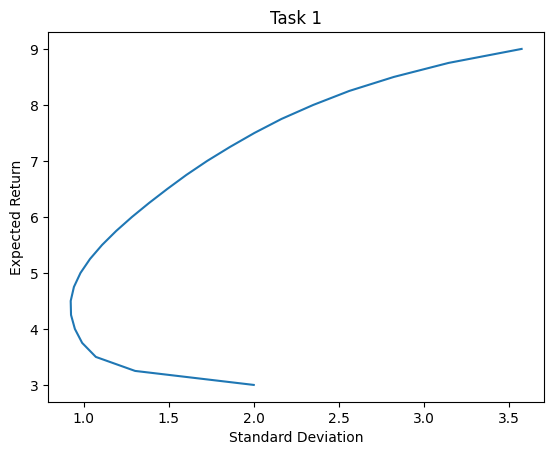

In [8]:
r = [3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 5.75, 6, 6.25, 6.5, 6.75, 7, 7.25, 7.5, 7.75, 8, 8.25, 8.5, 8.75, 9]
variances = []
for ex in r: 
    variances.append(markowitz_optimization_1(C, mmu, n, ex))
    
std_deviations = np.sqrt(variances)

plt.plot(std_deviations, r)
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.title('Task 1')
plt.show()





## Task 2

In [9]:
def markowitz_optimization_2(C, mmu, n, expected_return):

    constraints = [
        {'type': 'ineq', 'fun': lambda x: 1 - np.sum(x)}, # Constraint to make sum of weights of invesments in the portafolio to be less than or equal to 1
        {'type': 'eq', 'fun': lambda x: np.dot(mmu, x) - expected_return}
    ]
    
    # Define the bounds for the asset weights
    bounds = [(0, 1) for _ in range(n)]

    def objective(x):
        return np.dot(np.dot(x.T, C), x)

    x0 = np.array([1./n] * n)

    result = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=constraints)

    optimal_weights = result.x
    portfolio_variance = np.dot(np.dot(optimal_weights.T, C), optimal_weights)
    return portfolio_variance


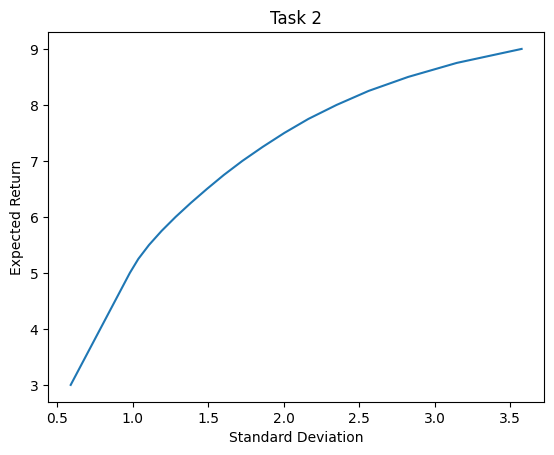

In [10]:
r = [3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 5.75, 6, 6.25, 6.5, 6.75, 7, 7.25, 7.5, 7.75, 8, 8.25, 8.5, 8.75, 9]
variances = []
for ex in r: 
    variances.append(markowitz_optimization_2(C, mmu, n, ex))
    
import numpy as np
std_deviations = np.sqrt(variances)

plt.plot(std_deviations, r)
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.title('Task 2')
plt.show()





## Task 3



In [11]:
def markowitz_optimization_3(C, mmu, n, expected_return):

    constraints = [
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}, 
        {'type': 'ineq', 'fun': lambda x: np.dot(mmu, x) - expected_return} # Constraint to make the expected return of the portafolio to be greater than or equal to the given expected return
    ]
    bounds = tuple((0, 1) for _ in range(n))

    def objective(x):
        return np.dot(np.dot(x.T, C), x)

    x0 = np.array([1./n] * n)

    result = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=constraints)

    optimal_weights = result.x
    portfolio_variance = np.dot(np.dot(optimal_weights.T, C), optimal_weights)
    return portfolio_variance
    #portfolio_variance, optimal_weights, result.success, result.message


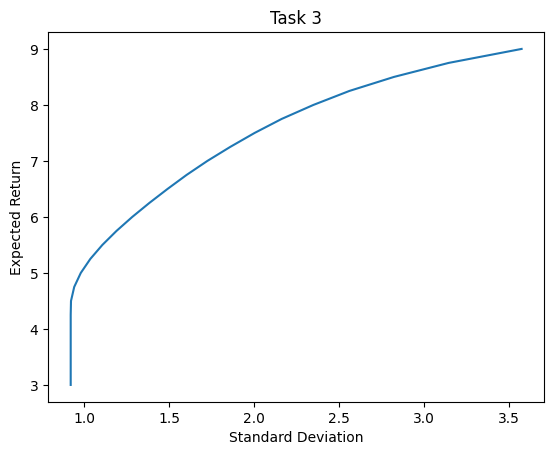

In [12]:
r = [3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 5.75, 6, 6.25, 6.5, 6.75, 7, 7.25, 7.5, 7.75, 8, 8.25, 8.5, 8.75, 9]
variances = []
for ex in r: 
    variances.append(markowitz_optimization_3(C, mmu, n, ex))
    
std_deviations = np.sqrt(variances)

plt.plot(std_deviations, r)
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.title('Task 3')
plt.show()


## Task 4

In [13]:
def markowitz_optimization_4(C, mmu, n, expected_return):

    constraints = [
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}, 
        {'type': 'eq', 'fun': lambda x: np.dot(mmu, x) - expected_return} 
    ]
    bounds = tuple((-1, 1) for _ in range(n))

    def objective(x):
        return np.dot(np.dot(x.T, C), x)

    x0 = np.array([1./n] * n)

    result = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=constraints)

    optimal_weights = result.x
    portfolio_variance = np.dot(np.dot(optimal_weights.T, C), optimal_weights)
    return portfolio_variance


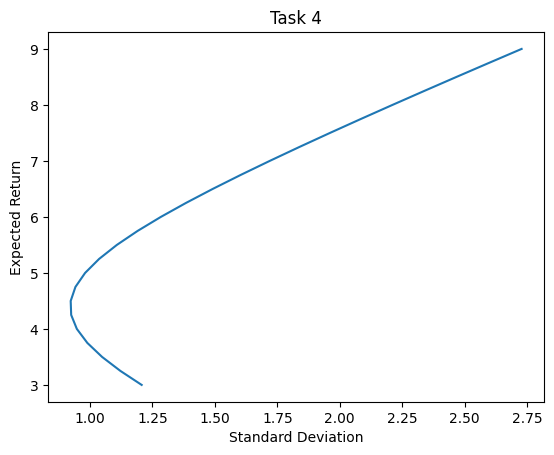

In [14]:
r = [3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 5.75, 6, 6.25, 6.5, 6.75, 7, 7.25, 7.5, 7.75, 8, 8.25, 8.5, 8.75, 9]
variances = []
for ex in r: 
    variances.append(markowitz_optimization_4(C, mmu, n, ex))
    
std_deviations = np.sqrt(variances)

plt.plot(std_deviations, r)
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.title('Task 4')
plt.show()